In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
#from injections import 

In [2]:
BBH_path='data_BBH'
BNS_path='data_BNS'
BBH_check_path='data_BBH_check'
BNS_check_path='data_BNS_check'

In [3]:
injections_BNS = pickle.load(open(BNS_path+'/injections-BNS.p', "rb"))
injections_BBH = pickle.load(open(BBH_path+'/injections-BBH.p', "rb"))
injections_check_BNS = pickle.load(open(BNS_check_path+'/injections-BNS.p', "rb"))
injections_check_BBH = pickle.load(open(BBH_check_path+'/injections-BBH.p', "rb"))

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [4]:
mass_1=np.array([])
mass_2=np.array([])
mass_1_check=np.array([])
mass_2_check=np.array([])
identity=np.array([],dtype=bool)
identity_check=np.array([],dtype=bool)
#num_injections=len(injections_BNS)+len(injections_BBH)
#num_injections_check=len(injections_check_BNS)+len(injections_check_BBH)

for i in range(len(injections_BNS)):
    mass_1=np.append(mass_1,injections_BNS[i][0]["mass_1"])
    mass_2=np.append(mass_2,injections_BNS[i][0]["mass_2"])
    identity=np.append(identity,True)

for i in range(len(injections_BBH)):
    mass_1=np.append(mass_1,injections_BBH[i][0]["mass_1"])
    mass_2=np.append(mass_2,injections_BBH[i][0]["mass_2"])
    identity=np.append(identity,False)
    
for i in range(len(injections_check_BNS)):
    mass_1_check=np.append(mass_1_check,injections_check_BNS[i][0]["mass_1"])
    mass_2_check=np.append(mass_2_check,injections_check_BNS[i][0]["mass_2"])
    identity_check=np.append(identity_check,True)

for i in range(len(injections_check_BBH)):
    mass_1_check=np.append(mass_1_check,injections_check_BBH[i][0]["mass_1"])
    mass_2_check=np.append(mass_2_check,injections_check_BBH[i][0]["mass_2"])
    identity_check=np.append(identity_check,False)
    

num_injections=len(injections_BNS)+len(injections_BBH)
num_injections_check=len(injections_check_BNS)+len(injections_check_BBH)

In [5]:
M_chirp=(mass_1*mass_2)**(3/5)/(mass_1+mass_2)**(1/5)
eta=(mass_1*mass_2)/(mass_1+mass_2)**2.0

M_chirp_check=(mass_1_check*mass_2_check)**(3/5)/(mass_1_check+mass_2_check)**(1/5)
eta_check=(mass_1_check*mass_2_check)/(mass_1_check+mass_2_check)**2.0

In [6]:
# For now we have 2features, so let's use 2N+1 neighbors
num_neighbors = 5
KNC = KNeighborsClassifier(num_neighbors)

In [7]:
X_train = np.column_stack([M_chirp,eta])
Y_train = identity

print(X_train)
print(Y_train)

X_train=np.reshape(X_train,(num_injections,2))

X_train.shape, Y_train.shape

[[ 1.29035298  0.24980587]
 [ 1.12588518  0.2484806 ]
 [ 1.11666327  0.24998255]
 [ 1.27156564  0.24774179]
 [ 1.1262607   0.2497245 ]
 [ 1.26884481  0.24988416]
 [ 1.15394332  0.2495651 ]
 [ 1.18403758  0.24446446]
 [ 1.05770484  0.24793244]
 [ 1.23793927  0.24753015]
 [ 1.22074617  0.24954097]
 [ 1.21021168  0.24986538]
 [ 1.19968162  0.24991543]
 [ 1.26572253  0.24841955]
 [ 1.21497215  0.24950176]
 [ 1.12908083  0.24969867]
 [ 1.08545332  0.24993051]
 [ 1.05230209  0.24581442]
 [ 1.16760273  0.24842993]
 [ 1.08240616  0.24751327]
 [ 1.09078654  0.24913716]
 [ 1.16647     0.24911478]
 [ 1.20295621  0.24879655]
 [ 1.23487958  0.24920751]
 [ 1.24692055  0.24817441]
 [ 1.14310903  0.23967279]
 [ 1.26816972  0.24865542]
 [ 1.15080213  0.24830781]
 [ 1.19177948  0.24995341]
 [ 1.26498921  0.24997939]
 [ 1.18071194  0.24946038]
 [ 1.22735387  0.24700605]
 [ 1.1644246   0.24723801]
 [ 1.06655639  0.24966039]
 [ 1.03385937  0.24386796]
 [ 1.13583771  0.24214366]
 [ 1.18755845  0.24876124]
 

((360, 2), (360,))

In [8]:
KNC.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
X_check=np.column_stack([M_chirp_check,eta_check])
print(len(X_check[0]))
Y_check= identity_check
X_check=np.reshape(X_check,(num_injections_check,2))
    
real_sol=KNC.predict(X_check)
#print(Y_check,real_sol)

Comparison=[Y_check==real_sol]
ind=[~Y_check==real_sol]
num_right=np.sum(Comparison)
    
print(Comparison)
#ind=np.where(X_check[Comparison])
print(X_check[ind])
frac_right=num_right/num_injections_check
    
#tot_num_right=tot_num_right+num_right
print(frac_right)


#print(tot_num_right/(checks*check_points))

2
[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])]
[]
1.0


/miniconda3/envs/genv/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


In [20]:
data={r'$\mathcal{M}$' : M_chirp, r'$\eta$' : eta, 'identity' : identity}
datapanda=pd.DataFrame(data=data)

data_check={'M_chirp' : M_chirp_check,'eta' : eta_check, 'identity' : identity_check}
datapanda_check=pd.DataFrame(data=data_check)

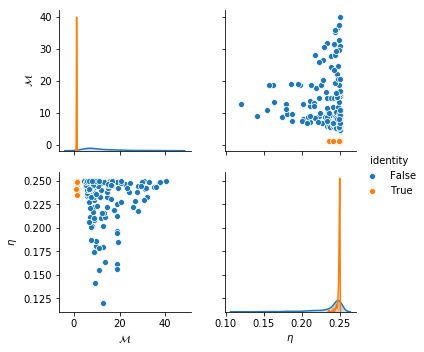

In [21]:
pairplots = sns.pairplot(datapanda,vars=[r'$\mathcal{M}$',r'$\eta$'],hue='identity',diag_kind='auto')

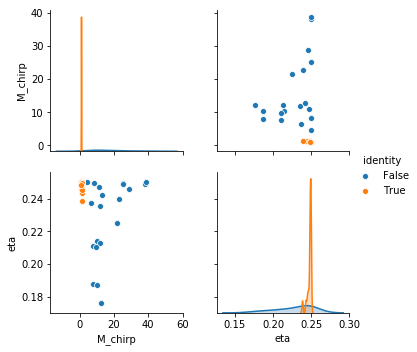

In [12]:
pairplots_check = sns.pairplot(datapanda_check,vars=['M_chirp','eta'],hue='identity',diag_kind='auto')